In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import sys


# path bin of FFmpeg
ffmpeg_bin_path = r"C:\Users\arezk\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-8.0.1-full_build\bin"
os.environ["PATH"] += os.pathsep + ffmpeg_bin_path

sys.path.append('..')


In [3]:
from src.utils import preprocess_musdb_and_save 
from sklearn.model_selection import train_test_split
import musdb
import matplotlib.pyplot as plt
import numpy as np


In [4]:
mus = musdb.DB(root='../data/mus', is_wav=False)

print(f"Total tracks: {len(mus.tracks)}")

# load the train and the test set 
mus_train = musdb.DB(root='../data/musdb18', is_wav=False, subsets='train')
mus_test = musdb.DB(root='../data/musdb18', is_wav=False, subsets='test')

train_tracks = mus_train.tracks


# Split test en test + valid 
test_tracks, valid_tracks = train_test_split(
    mus_test.tracks, 
    test_size=0.5,  
    random_state=42
)

print(f"Train: {len(train_tracks)}")
print(f"Valid: {len(valid_tracks)}")
print(f"Test: {len(test_tracks)}")




Total tracks: 0
Train: 100
Valid: 25
Test: 25


In [5]:
# Preprocess and save tarin spectrograms
preprocess_musdb_and_save(
    tracks= train_tracks,
    output_folder='../spectrograms/musdb18/train',
)


Processing tracks: 100%|██████████| 100/100 [19:55<00:00, 11.96s/it]



Preprocessing done! Spectrograms saved in: ../spectrograms/musdb18/train


In [11]:
preprocess_musdb_and_save(
    tracks=test_tracks,
    output_folder='../spectrograms/musdb18/test',
)

Processing tracks: 100%|██████████| 25/25 [05:38<00:00, 13.55s/it]


Preprocessing done! Spectrograms saved in: ../spectrograms/musdb18/test


In [10]:
preprocess_musdb_and_save(
    tracks=valid_tracks,
    output_folder='../spectrograms/musdb18/valid',
)

Processing tracks:   0%|          | 0/25 [00:00<?, ?it/s]

Processing tracks: 100%|██████████| 25/25 [05:14<00:00, 12.60s/it]


Preprocessing done! Spectrograms saved in: ../spectrograms/musdb18/valid


In [6]:
# Load and inspect saved spectrograms

mix_spec = np.load('../spectrograms/musdb18/train/mixture/A_Classic_Education_-_NightOwl_spec.npy')
vocal_spec = np.load('../spectrograms/musdb18/train/vocal/A_Classic_Education_-_NightOwl_spec.npy')

print(f"Mix shape: {mix_spec.shape}")
print(f"Vocal shape: {vocal_spec.shape}")
print(f"Mix range: [{mix_spec.min()}, {mix_spec.max()}]")
print(f"Vocal range: [{vocal_spec.min()}, {vocal_spec.max()}]")

Mix shape: (513, 1827)
Vocal shape: (513, 1827)
Mix range: [2.9373642208592194e-07, 1.0]
Vocal range: [3.269892089701949e-08, 0.4552386639836106]


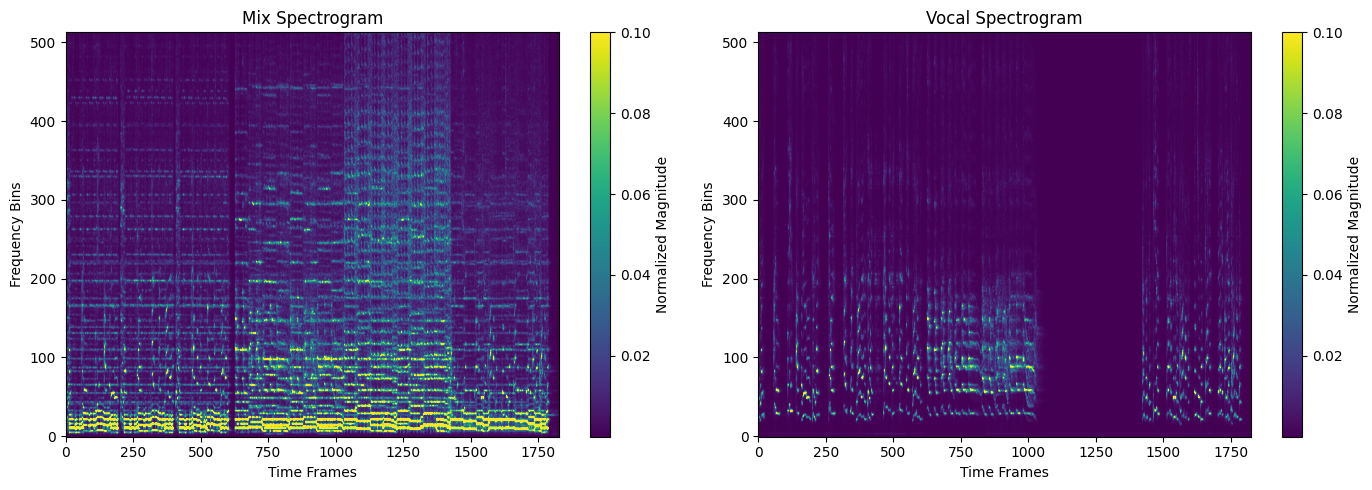

In [9]:
# plot the normalized spectrogram


plt.figure(figsize=(14, 5))

# Mix spectrogram
plt.subplot(1, 2, 1)
plt.imshow(mix_spec, aspect='auto', origin='lower', cmap='viridis',vmax=0.1  )
plt.colorbar(label='Normalized Magnitude')
plt.title('Mix Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')

# Vocal spectrogram
plt.subplot(1, 2, 2)
plt.imshow(vocal_spec, aspect='auto', origin='lower', cmap='viridis', vmax=0.1 )
plt.colorbar(label='Normalized Magnitude')
plt.title('Vocal Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')

plt.tight_layout()
plt.show()